Code to import the image files

In [ ]:
url_and_filenames = [
    ('https://drive.google.com/uc?id=1P2rO7bw_CCTPZFaPD8EJoANU9l0xw9qA', 'grey_1.png'),
    ('https://drive.google.com/uc?id=1J6wR3ROV6dmYLFKzs8RfOesAHP-pkosg', 'grey_2.png'),
    ('https://drive.google.com/uc?id=1fl2mKMFY3SPbDBY45N0mN3vuavfB31zl', 'grey_3.png'),
    ('https://drive.google.com/uc?id=1HEymhp0Fvq3ZAhS8Pi7uw0dd2AsxEza0', 'grey_4.png'),
]
for url, output_filename in url_and_filenames:
    !wget "{url}" -O "{output_filename}"

**AIM**

Introduce the concept of histograms in digital images, focusing on their role in representing the distribution of pixel intensities within an image. This understanding is foundational for grasping the subsequent processes of histogram equalization and histogram matching.


**STEPS**

Step 1: Read the Input and Reference Images
Load the input and reference images into the program. If these images are in color, you may need to convert them to grayscale to simplify the process, as histogram matching is typically discussed in the context of grayscale images.

Step 2: Calculate Histograms
Compute the histograms of both the input and reference images. The histogram represents the distribution of pixel intensities (from 0 to 255 for grayscale images).

Step 3: Compute the Cumulative Distribution Function (CDF)
The CDF is used to map the old pixel values in the images to new ones. Calculate the CDF for both the input and reference images based on their histograms.

Step 4: Create a Mapping Function
Maps pixel values from the input image's histogram to match the reference image's histogram as closely as possible.

Step 5: Apply the Mapping to the Input Image
Apply the mapping code to the input image to modify its histogram to closely resemble the histogram of the reference image.

Step 6: Display or Save the Result
After applying the histogram matching, the modified image can be displayed or saved. This image will have a histogram that matches the reference image as closely as possible.

**Conclusion**

Understanding and applying image histograms, histogram equalization, and histogram matching are fundamental skills in digital image processing. These techniques allow for significant improvements in image contrast and standardization across different images, enhancing both visual quality and the effectiveness of subsequent image analysis algorithms.

**Reference**

[https://towardsdatascience.com/histogram-matching-ee3a67b4cbc1](https://towardsdatascience.com/histogram-matching-ee3a67b4cbc1)


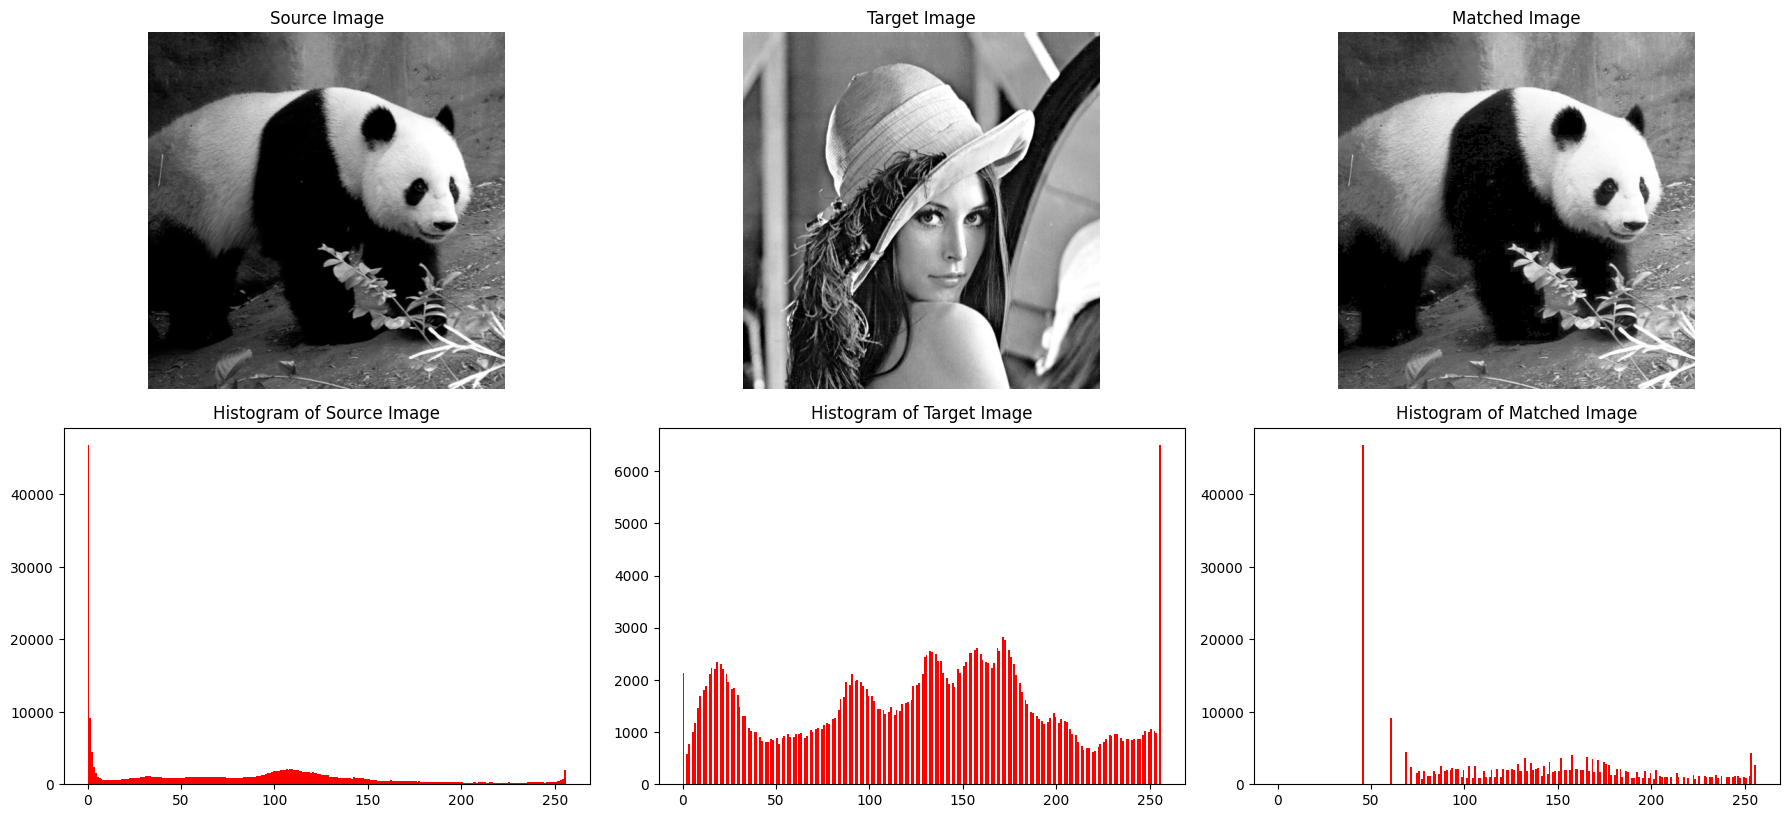

In [ ]:
import cv2
import matplotlib.pyplot as plt
import numpy as np

img_A = cv2.imread(r"/content/grey_1.png", 0)
img_B = cv2.imread(r"/content/grey_2.png", 0)

def hist_Cdf(image):
    height, width = image.shape
    histogram = np.zeros(256, dtype=int)

    for i in range(height):
        for j in range(width):
            histogram[image[i, j]] += 1

    cdf = np.cumsum(histogram)
    return histogram, cdf

hist_A, cdf_A = hist_Cdf(img_A)
hist_B, cdf_B = hist_Cdf(img_B)

normalize_A = np.round((cdf_A * 255) / float(cdf_A.max()))
normalize_B = np.round((cdf_B * 255) / float(cdf_B.max()))

intensity = np.zeros(256)
for i in range(256):
    intensity[i] = np.argmin(np.abs(normalize_A[i] - normalize_B))

matched_img = intensity[img_A]

plt.figure(figsize=(18, 12))

plt.subplot(331), plt.imshow(img_A, cmap='gray'), plt.title('Source Image')
plt.axis('off')

plt.subplot(332), plt.imshow(img_B, cmap='gray'), plt.title('Target Image')
plt.axis('off')

plt.subplot(333), plt.imshow(matched_img, cmap='gray'), plt.title('Matched Image')
plt.axis('off')

plt.subplot(334), plt.hist(img_A.flatten(), 256, [0,256], color='r'), plt.title('Histogram of Source Image')
plt.subplot(335), plt.hist(img_B.flatten(), 256, [0,256], color='r'), plt.title('Histogram of Target Image')
plt.subplot(336), plt.hist(matched_img.flatten(), 256, [0,256], color='r'), plt.title('Histogram of Matched Image')

plt.tight_layout()
plt.show()


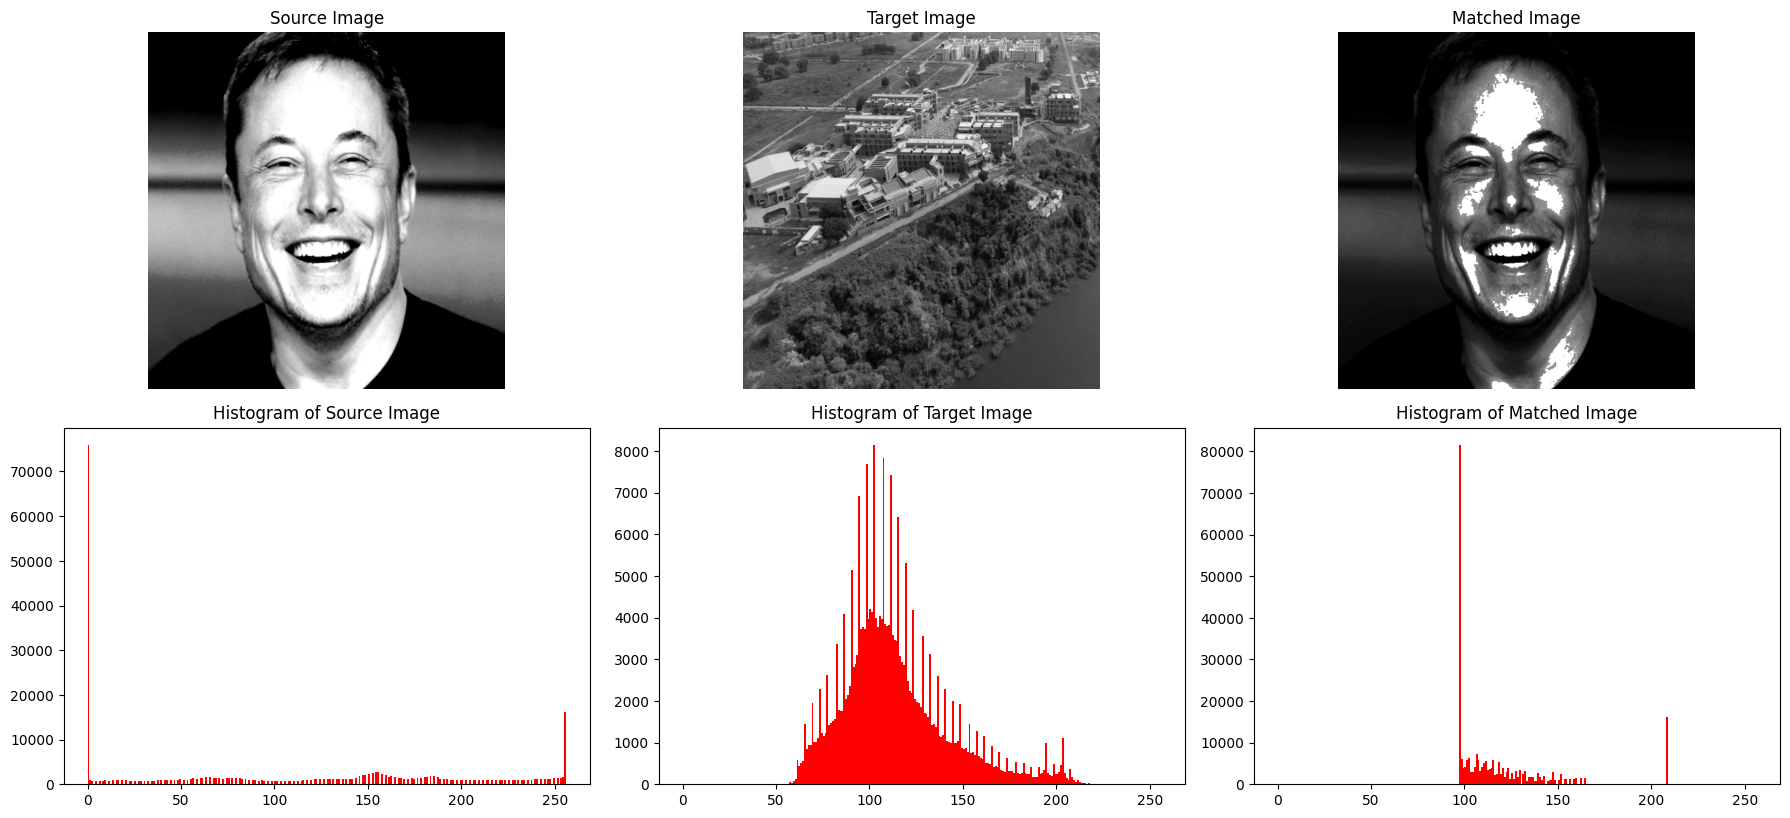

In [ ]:
# @title
import cv2
import matplotlib.pyplot as plt
import numpy as np

img_A = cv2.imread(r"/content/grey_4.png", 0)
img_B = cv2.imread(r"/content/grey_3.png", 0)

def hist_Cdf(image):
    height, width = image.shape
    histogram = np.zeros(256, dtype=int)

    for i in range(height):
        for j in range(width):
            histogram[image[i, j]] += 1

    cdf = np.cumsum(histogram)
    return histogram, cdf

hist_A, cdf_A = hist_Cdf(img_A)
hist_B, cdf_B = hist_Cdf(img_B)

normalize_A = np.round((cdf_A * 255) / float(cdf_A.max()))
normalize_B = np.round((cdf_B * 255) / float(cdf_B.max()))

intensity = np.zeros(256)
for i in range(256):
    intensity[i] = np.argmin(np.abs(normalize_A[i] - normalize_B))

matched_img = intensity[img_A]

plt.figure(figsize=(18, 12))

plt.subplot(331), plt.imshow(img_A, cmap='gray'), plt.title('Source Image')
plt.axis('off')

plt.subplot(332), plt.imshow(img_B, cmap='gray'), plt.title('Target Image')
plt.axis('off')

plt.subplot(333), plt.imshow(matched_img, cmap='gray'), plt.title('Matched Image')
plt.axis('off')

plt.subplot(334), plt.hist(img_A.flatten(), 256, [0,256], color='r'), plt.title('Histogram of Source Image')
plt.subplot(335), plt.hist(img_B.flatten(), 256, [0,256], color='r'), plt.title('Histogram of Target Image')
plt.subplot(336), plt.hist(matched_img.flatten(), 256, [0,256], color='r'), plt.title('Histogram of Matched Image')

plt.tight_layout()
plt.show()

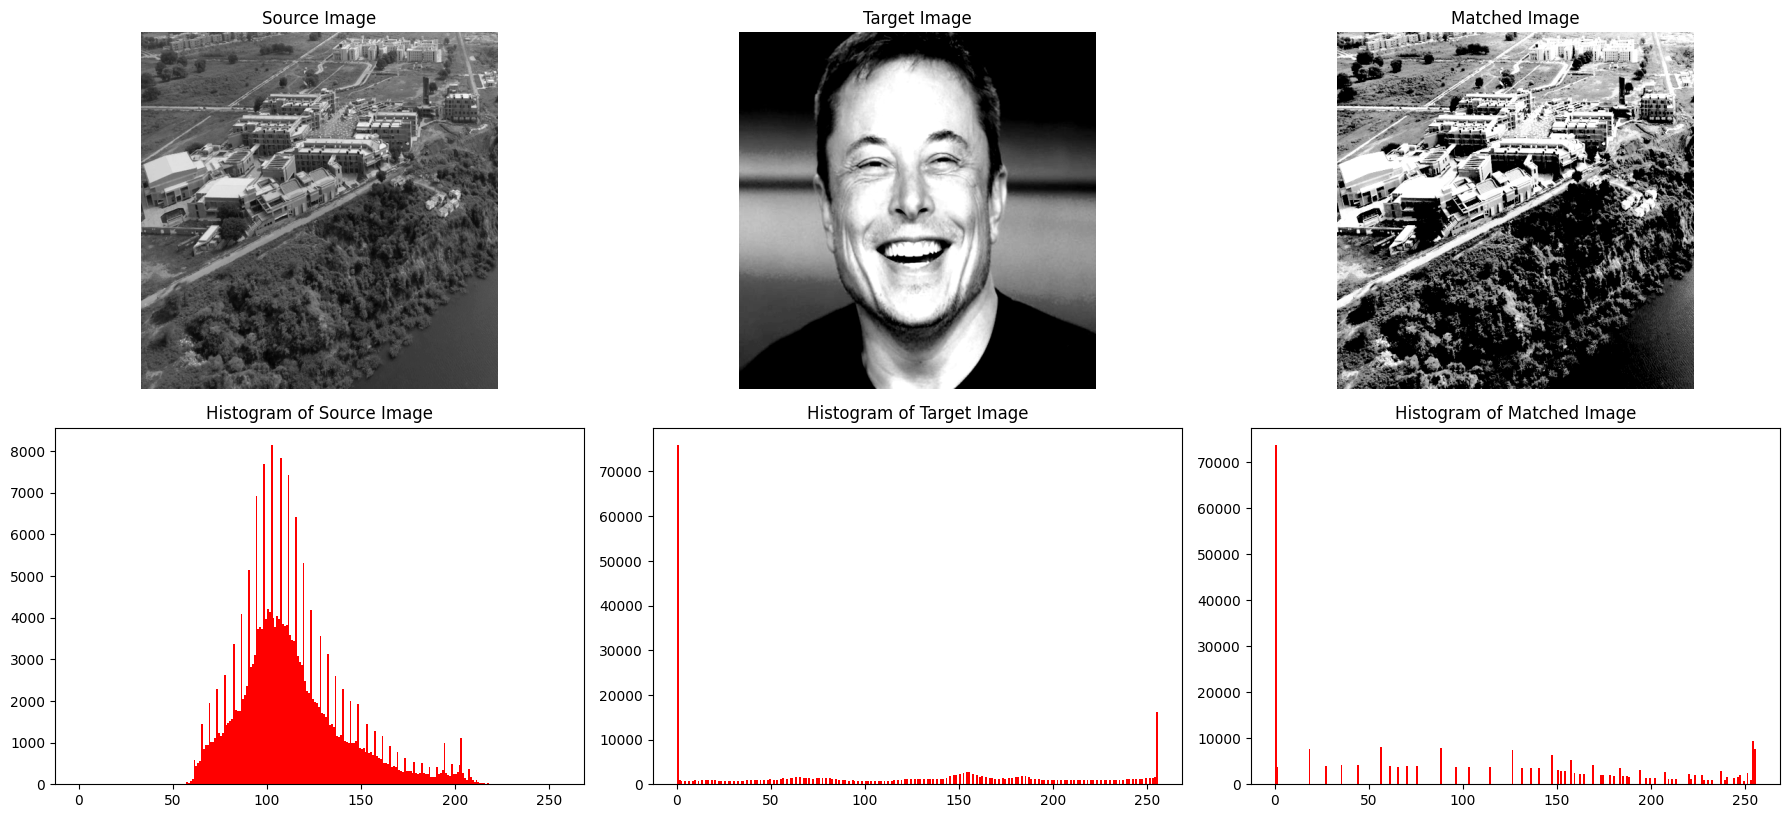

In [ ]:
# @title
import cv2
import matplotlib.pyplot as plt
import numpy as np

img_A = cv2.imread(r"/content/grey_3.png", 0)
img_B = cv2.imread(r"/content/grey_4.png", 0)

def hist_Cdf(image):
    height, width = image.shape
    histogram = np.zeros(256, dtype=int)

    for i in range(height):
        for j in range(width):
            histogram[image[i, j]] += 1

    cdf = np.cumsum(histogram)
    return histogram, cdf

hist_A, cdf_A = hist_Cdf(img_A)
hist_B, cdf_B = hist_Cdf(img_B)

normalize_A = np.round((cdf_A * 255) / float(cdf_A.max()))
normalize_B = np.round((cdf_B * 255) / float(cdf_B.max()))

intensity = np.zeros(256)
for i in range(256):
    intensity[i] = np.argmin(np.abs(normalize_A[i] - normalize_B))

matched_img = intensity[img_A]

plt.figure(figsize=(18, 12))

plt.subplot(331), plt.imshow(img_A, cmap='gray'), plt.title('Source Image')
plt.axis('off')

plt.subplot(332), plt.imshow(img_B, cmap='gray'), plt.title('Target Image')
plt.axis('off')

plt.subplot(333), plt.imshow(matched_img, cmap='gray'), plt.title('Matched Image')
plt.axis('off')

plt.subplot(334), plt.hist(img_A.flatten(), 256, [0,256], color='r'), plt.title('Histogram of Source Image')
plt.subplot(335), plt.hist(img_B.flatten(), 256, [0,256], color='r'), plt.title('Histogram of Target Image')
plt.subplot(336), plt.hist(matched_img.flatten(), 256, [0,256], color='r'), plt.title('Histogram of Matched Image')

plt.tight_layout()
plt.show()

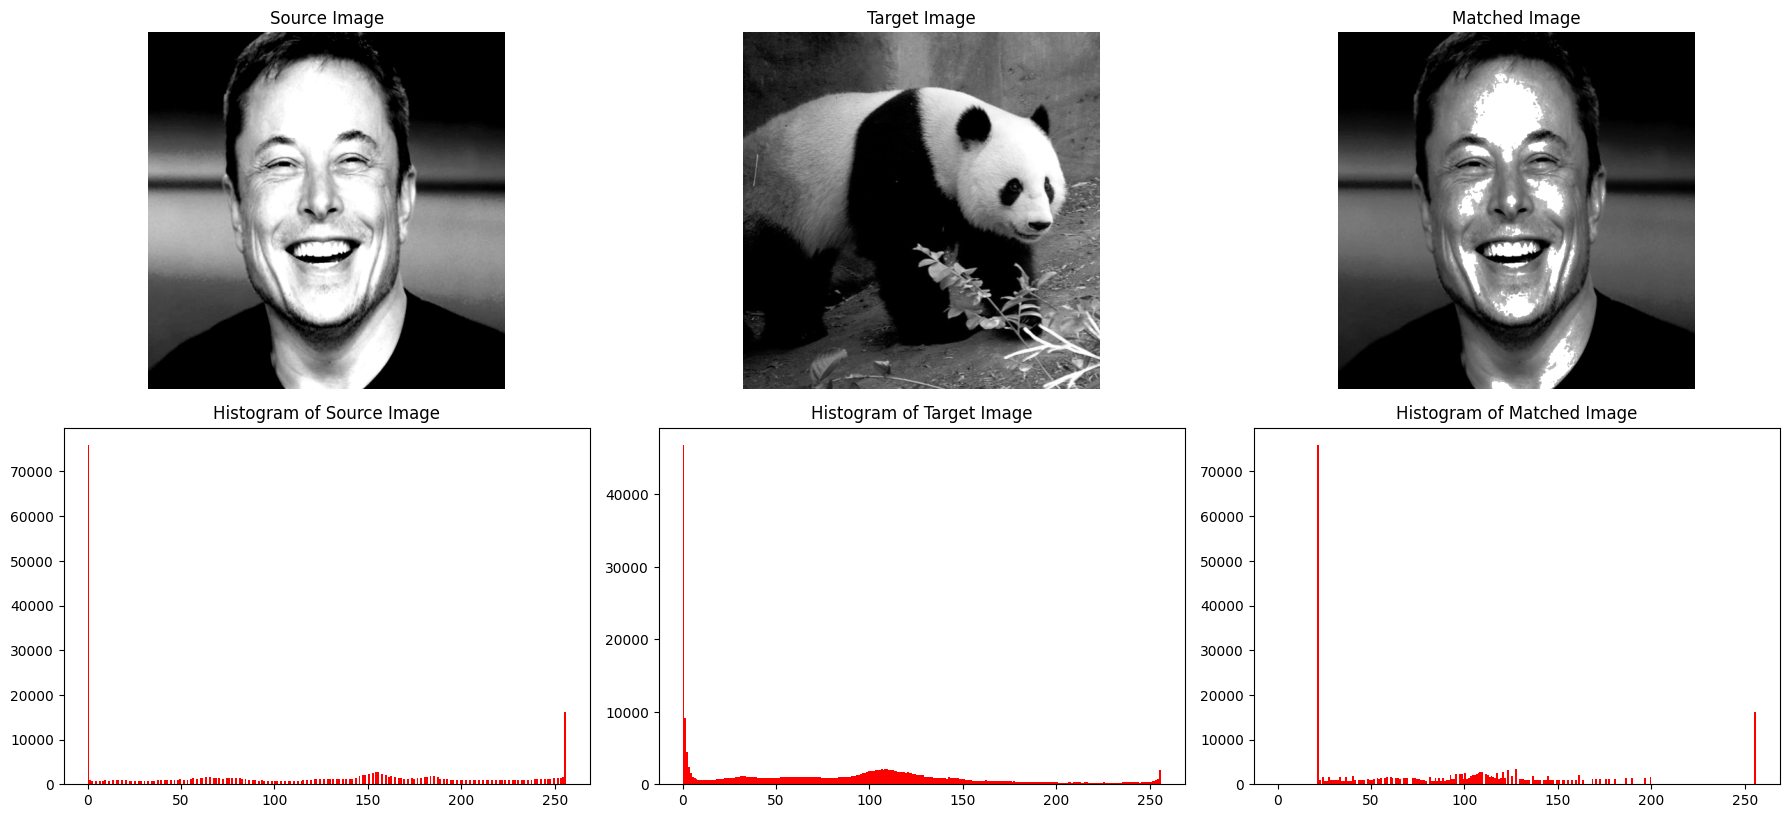

In [ ]:
# @title
import cv2
import matplotlib.pyplot as plt
import numpy as np

img_A = cv2.imread(r"/content/grey_4.png", 0)
img_B = cv2.imread(r"/content/grey_1.png", 0)

def hist_Cdf(image):
    height, width = image.shape
    histogram = np.zeros(256, dtype=int)

    for i in range(height):
        for j in range(width):
            histogram[image[i, j]] += 1

    cdf = np.cumsum(histogram)
    return histogram, cdf

hist_A, cdf_A = hist_Cdf(img_A)
hist_B, cdf_B = hist_Cdf(img_B)

normalize_A = np.round((cdf_A * 255) / float(cdf_A.max()))
normalize_B = np.round((cdf_B * 255) / float(cdf_B.max()))

intensity = np.zeros(256)
for i in range(256):
    intensity[i] = np.argmin(np.abs(normalize_A[i] - normalize_B))

matched_img = intensity[img_A]

plt.figure(figsize=(18, 12))

plt.subplot(331), plt.imshow(img_A, cmap='gray'), plt.title('Source Image')
plt.axis('off')

plt.subplot(332), plt.imshow(img_B, cmap='gray'), plt.title('Target Image')
plt.axis('off')

plt.subplot(333), plt.imshow(matched_img, cmap='gray'), plt.title('Matched Image')
plt.axis('off')

plt.subplot(334), plt.hist(img_A.flatten(), 256, [0,256], color='r'), plt.title('Histogram of Source Image')
plt.subplot(335), plt.hist(img_B.flatten(), 256, [0,256], color='r'), plt.title('Histogram of Target Image')
plt.subplot(336), plt.hist(matched_img.flatten(), 256, [0,256], color='r'), plt.title('Histogram of Matched Image')

plt.tight_layout()
plt.show()